# 15 Minute Series: Demographic Analysis of San Diego
---

*Cara Higashi, Robert Lopez, Joseph Sy, Giovanni Ramos Gutierrez*

## Interpolation
---

In [1]:
import geopandas as gpd

In [2]:
file_path = 'data/sd_interpolation/sd_interpolation.shp'
sd_interpolation = gpd.read_file(file_path)

ERROR 1: PROJ: proj_create_from_database: Open of /opt/tljh/user/share/proj failed


<Axes: >

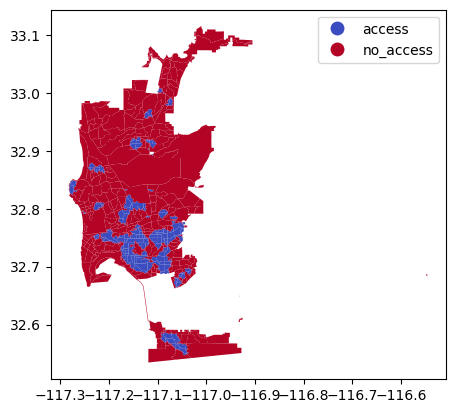

In [3]:
sd_interpolation.plot(column='access', cmap='coolwarm', legend=True)

In [4]:
sd_interpolation = sd_interpolation.rename(columns={
    'n_total_po': 'n_total_pop',
    'per_capita': 'per_capita_income',
    'p_nonhisp_': 'p_nonhisp_black_persons',
    'p_hispanic': 'p_hispanic_persons',
    'p_nonhis_1': 'p_nonhisp_white_persons',
    'p_asian_pe': 'p_asian_persons'
})

In [5]:
variables = [
   'n_total_pop', 'per_capita_income', 'p_nonhisp_black_persons', 'p_hispanic_persons', 'p_nonhisp_white_persons', 'p_asian_persons'

]

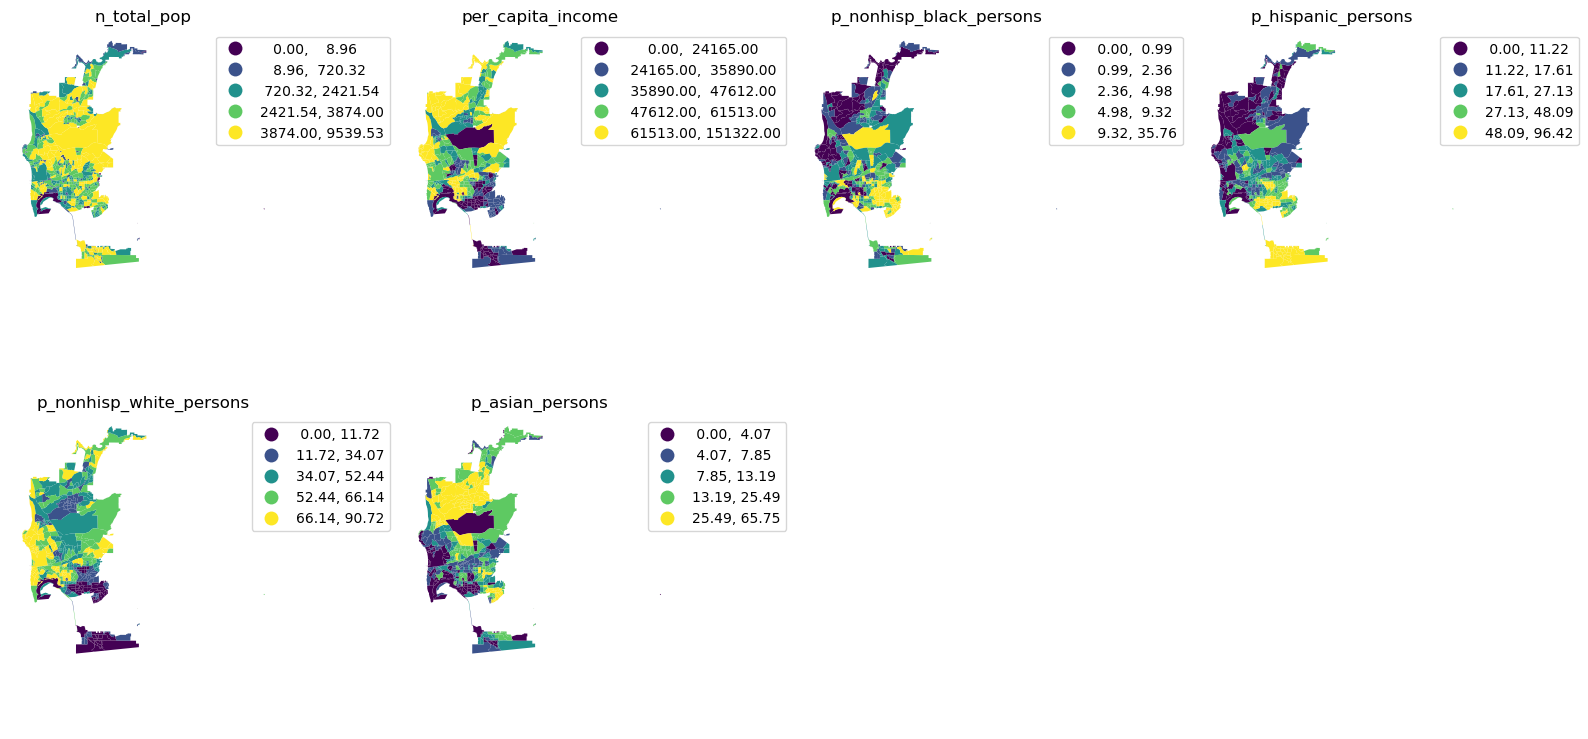

In [6]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
axes = axes.flatten()

for i, var in enumerate(variables):
    ax = axes[i]
    sd_interpolation.plot(column=var, scheme='quantiles', cmap='viridis', legend=True, ax=ax, legend_kwds={'bbox_to_anchor': (1.45, 1)})
    ax.set_title(var)
    for ax in axes:
     ax.axis('off')

plt.tight_layout()
plt.show()


In [7]:
access_subset = sd_interpolation[sd_interpolation['access'] == 'access']


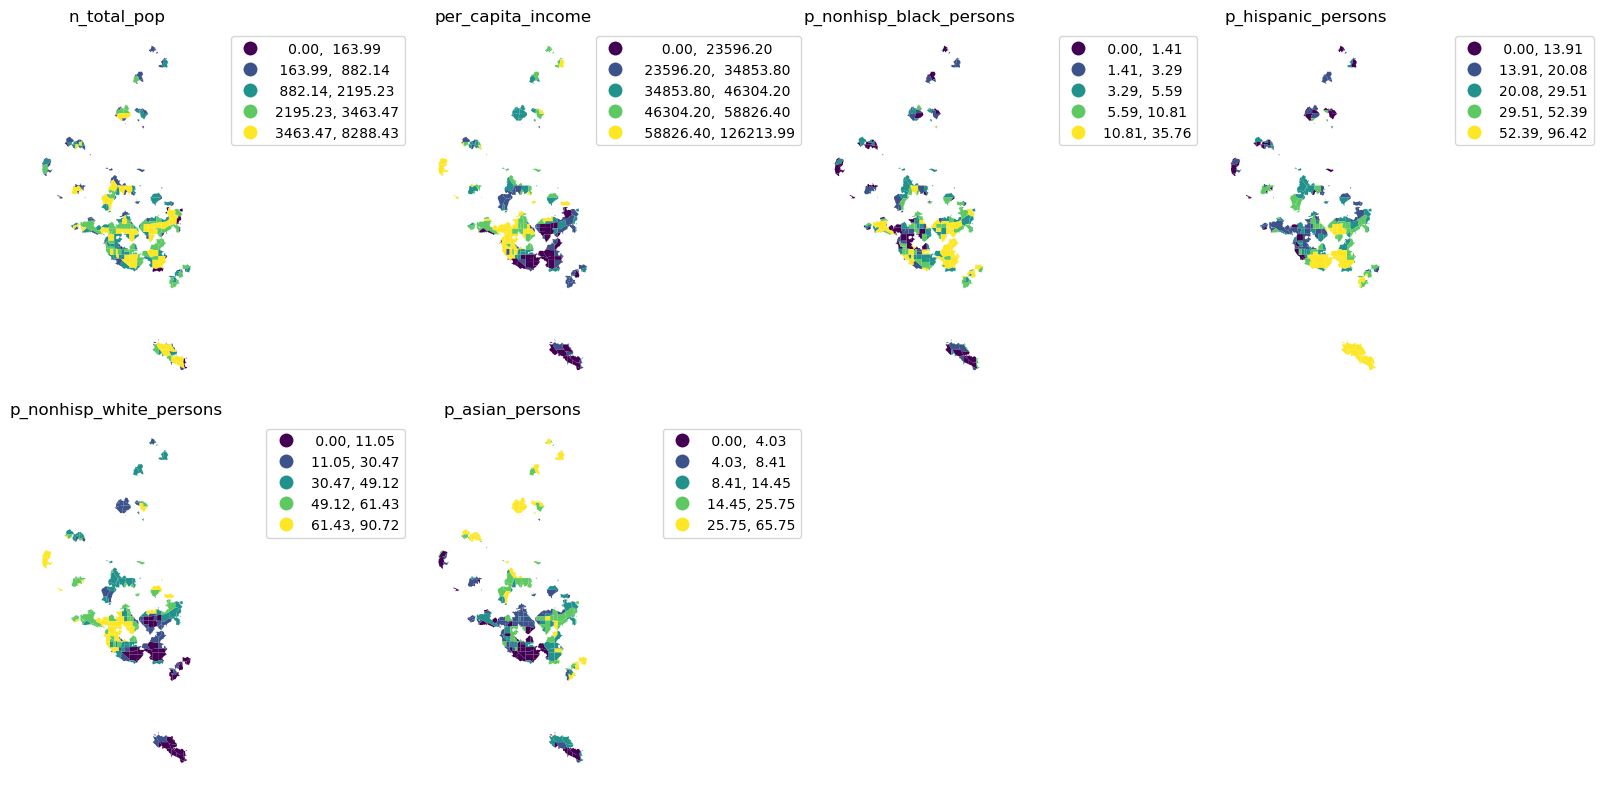

In [8]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
axes = axes.flatten()

for i, var in enumerate(variables):
    ax = axes[i]
    access_subset.plot(column=var, scheme='quantiles', cmap='viridis', legend=True, ax=ax, legend_kwds={'bbox_to_anchor': (2.3, 1)})
    ax.set_title(var)
    for ax in axes:
     ax.axis('off')

plt.tight_layout()
plt.show()

In [9]:
no_access_subset = sd_interpolation[sd_interpolation['access'] == 'no_access']

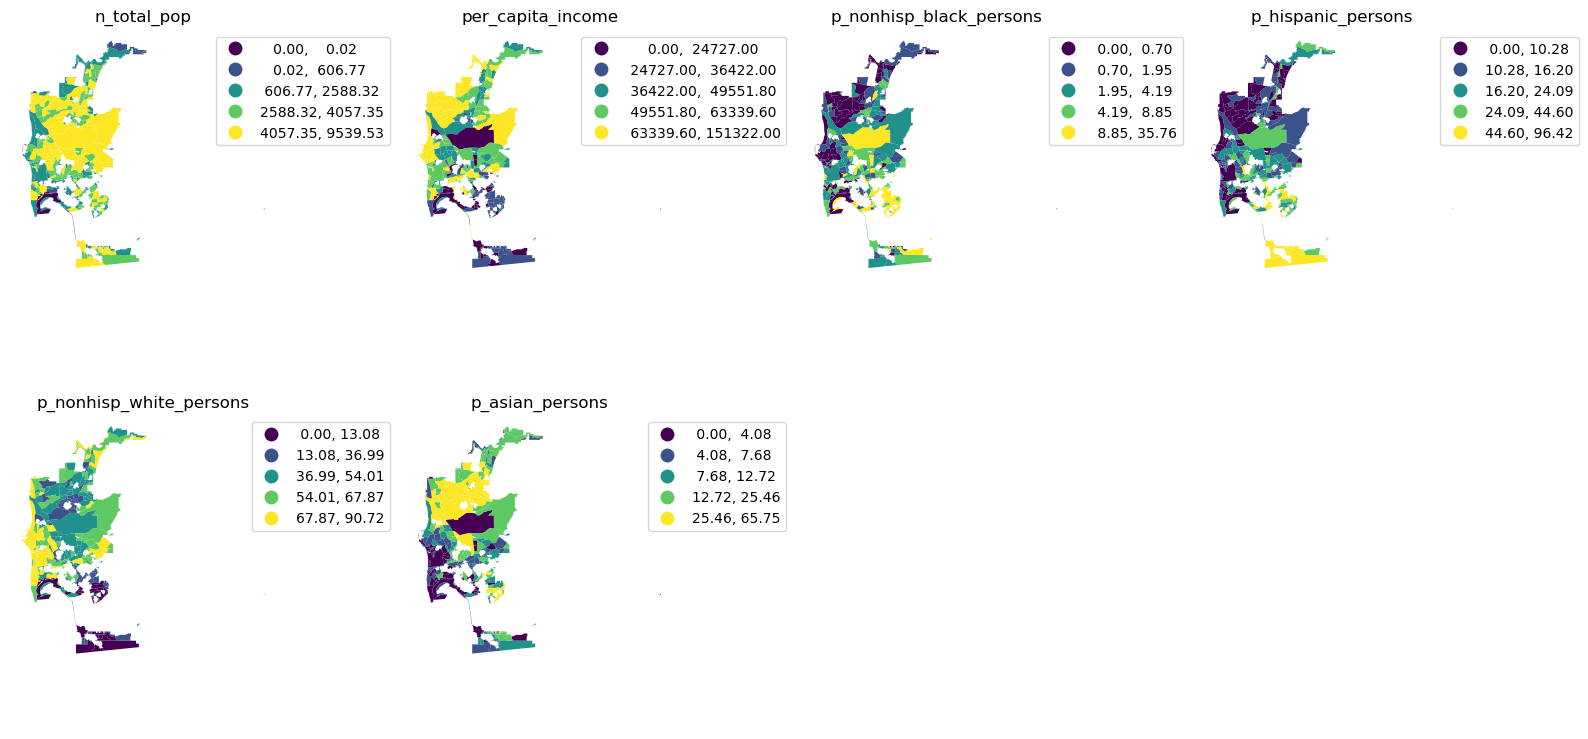

In [10]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
axes = axes.flatten()

for i, var in enumerate(variables):
    ax = axes[i]
    no_access_subset.plot(column=var, scheme='quantiles', cmap='viridis', legend=True, ax=ax, legend_kwds={'bbox_to_anchor': (1.45, 1)})
    ax.set_title(var)
    for ax in axes:
     ax.axis('off')

plt.tight_layout()
plt.show()

In [11]:
sd_interpolation[['per_capita_income', 'p_nonhisp_black_persons', 'p_hispanic_persons', 'p_nonhisp_white_persons', 'p_asian_persons','access']].groupby(by='access').mean()

,per_capita_income,p_nonhisp_black_persons,p_hispanic_persons,p_nonhisp_white_persons,p_asian_persons
access,,,,,
access,43997.444074,6.401598,32.824252,39.266870,16.177527
no_access,46233.735752,5.206896,27.983975,42.874313,14.891761


In [12]:
access = sd_interpolation[sd_interpolation['access'] == 'access']

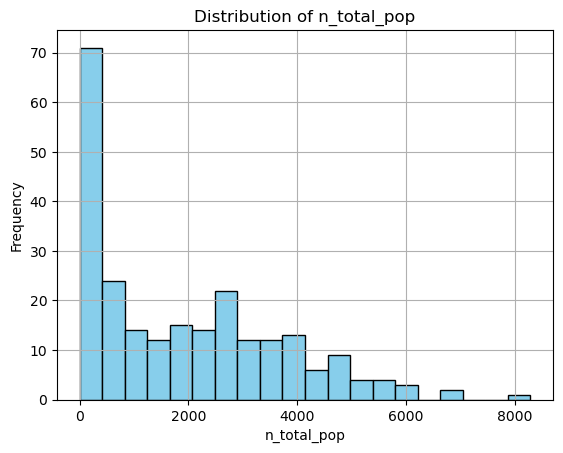

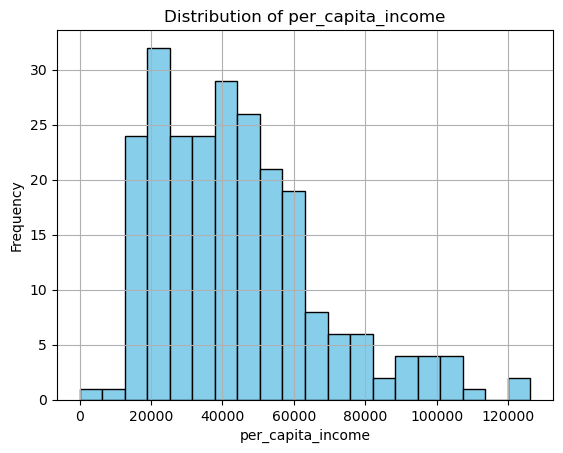

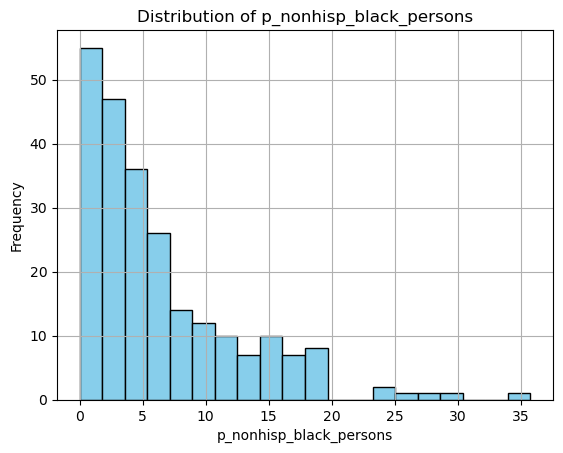

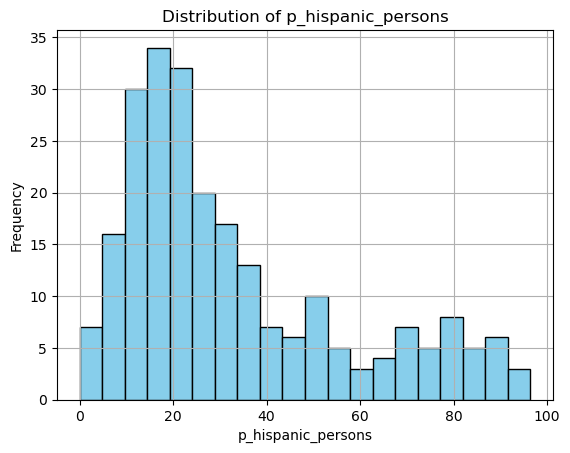

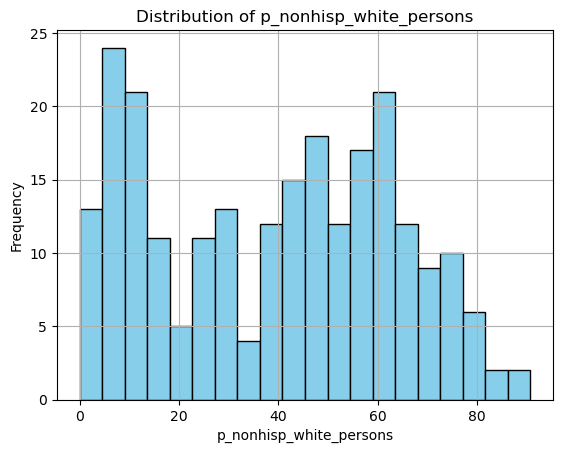

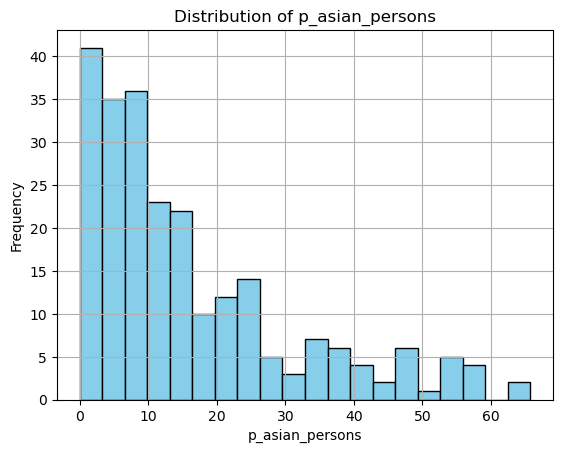

In [13]:
import matplotlib.pyplot as plt

for variable in variables:
    plt.figure()  
    plt.hist(access[variable], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    plt.grid(True)

plt.show()

Skewness: The distribution is right-skewed, indicating that a majority of the accessible areas have lower to middle-range per capita incomes. Most of the data points fall between $0 and $40,000, which suggests that these accessible areas are predominantly middle to lower-income regions.
High Income Areas: There are fewer areas with very high incomes. The presence of bars at higher income ranges (e.g., $80,000 to $120,000) shows that there are also some affluent neighborhoods within the 15-minute accessibility zones, though they are less common.
Economic Diversity: The spread of the data from very low to very high incomes suggests a diverse economic population within the areas marked as accessible. 

In [14]:
no_access= sd_interpolation[sd_interpolation['access'] == 'no_access']

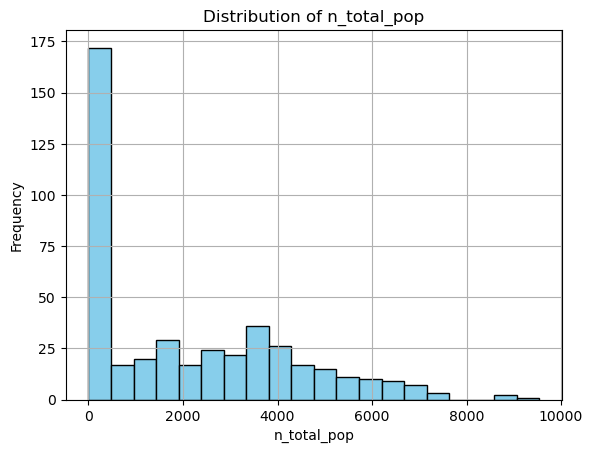

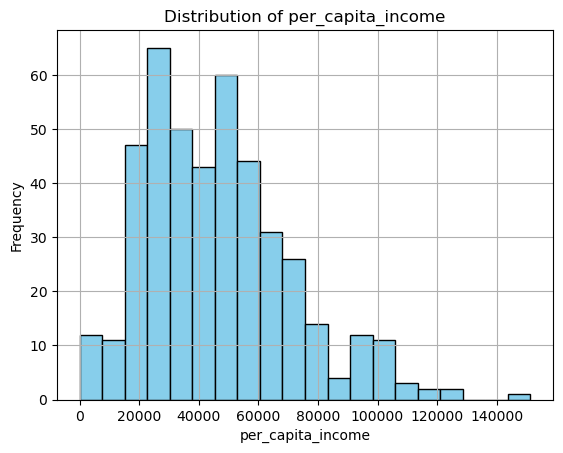

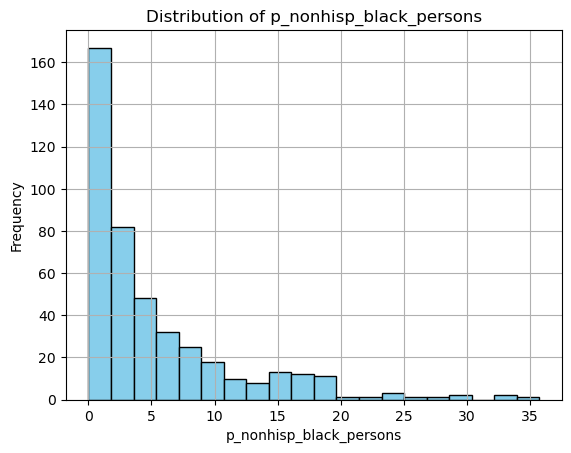

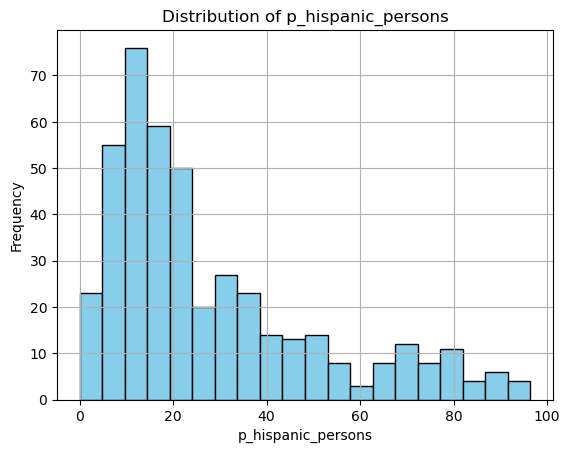

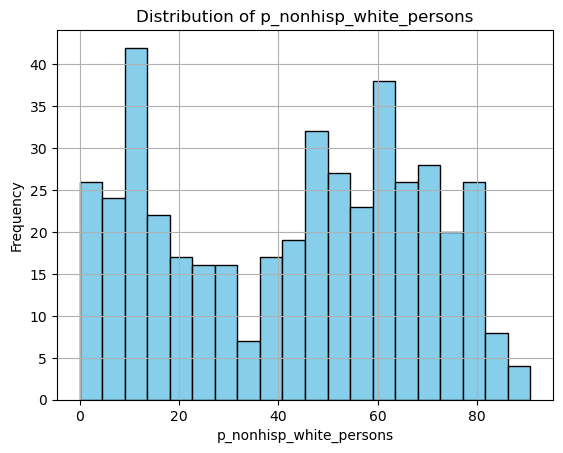

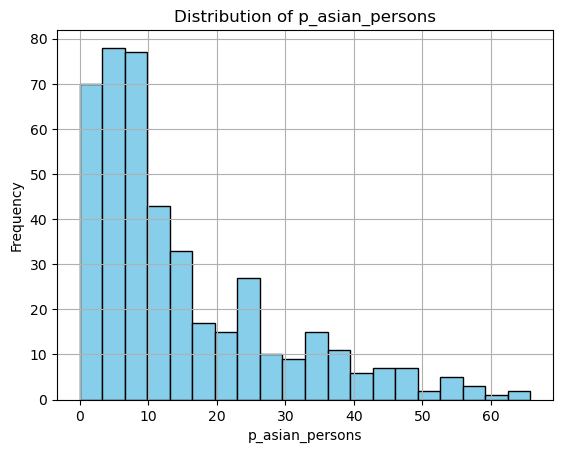

In [15]:
for variable in variables:
    plt.figure()  
    plt.hist(no_access[variable], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    plt.grid(True)

plt.show()

Mode: The mode of the distribution, or the most frequently occurring income range, appears to be around 40,000 to 60,000. This suggests that the median income level in non-accessible areas is higher compared to the accessible areas.
Spread: The distribution shows a significant spread from very low to high incomes, with tails extending into the higher income brackets up to $140,000. This indicates a wider variance in income in non-accessible areas compared to those with access.
Shape: The distribution is more symmetric compared to the accessible areas, though there is a slight right skew indicating the presence of high-income outliers.